In [23]:
#importing all the Ml libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Reading the dataset

In [24]:
df=pd.read_csv(r'hotel_bookings.csv')

In [25]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [26]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [27]:
df.shape

(119390, 32)

Displaying the null the values

In [28]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Droping the 2 columns which are not required

In [29]:
df.drop(["agent","company"],axis=1,inplace=True)

In [30]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

Here analaysing the data from which country the number of guests are more

In [31]:
df['country'].value_counts().index[0]

'PRT'

In [32]:
df['country'].fillna(df["country"].value_counts().index[0],inplace=True)

In [33]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [34]:
df.fillna(0,inplace=True)

In [35]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [36]:
filter1=(df['children']==0)& (df['adults']==0)&(df['babies']==0)

In [37]:
data=df[~filter1]

In [38]:
data.shape

(119210, 30)

In [39]:
data["is_canceled"].unique()

array([0, 1], dtype=int64)

In [40]:
data[data['is_canceled']==0]['country'].value_counts()/75011


PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [41]:
len(data[data['is_canceled']==0])

75011

In [42]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [43]:
country_wise_data.columns=["country","no_of_guests"]

In [44]:
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [45]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [46]:
import plotly.express as px

In [47]:
map_guest=px.choropleth(country_wise_data,locations=country_wise_data['country'],color=country_wise_data['no_of_guests'],
             hover_name=country_wise_data['country'],title="Home Country of Guests")

In [48]:
map_guest.show()

In [49]:
data2=data[data['is_canceled']==0]
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(Eur)')

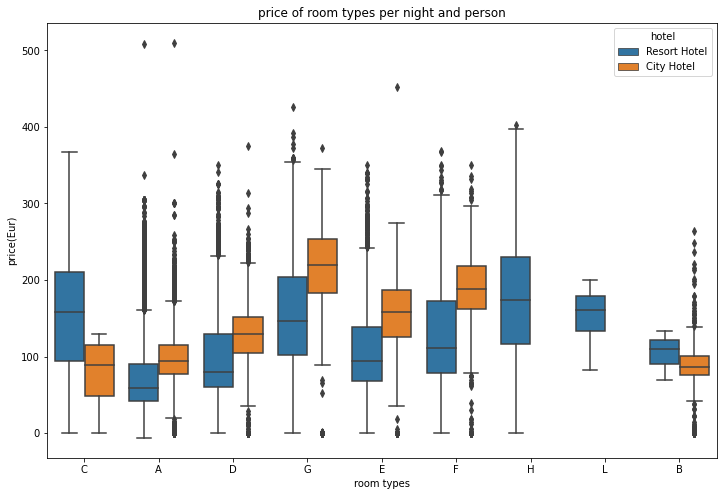

In [50]:
plt.figure(figsize=(12,8))
sb.boxplot(x="reserved_room_type",y="adr",hue="hotel",data=data2)
plt.title("price of room types per night and person")
plt.xlabel("room types")
plt.ylabel("price(Eur)")

In [51]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [52]:
data_resort=data[(data['hotel']=="Resort Hotel")&(data['is_canceled']==0)]
data_city=data[(data['hotel']=="City Hotel")&(data['is_canceled']==0)]

In [53]:
rush_resort=data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns=["month","no_of_guests"]

In [54]:
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [55]:
rush_city=data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns=["month","no_of_guests"]

In [56]:
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [57]:
final_rush=rush_resort.merge(rush_city,on="month")
final_rush.columns=["month","no_of_guests_resort","no_of_guests_city"]

In [58]:
final_rush

,month,no_of_guests_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [59]:
import sorted_months_weekdays
import sort_dataframeby_monthorweek as sd

In [60]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,"month")

In [61]:
px.line(data_frame=final_rush,x='month',y=["no_of_guests_resort","no_of_guests_city"])

In [62]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

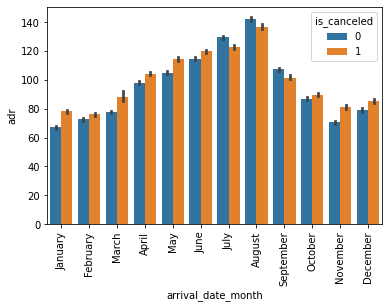

In [63]:
sb.barplot(x="arrival_date_month",y="adr",data=data,hue="is_canceled")
plt.xticks(rotation="vertical")
plt.show()

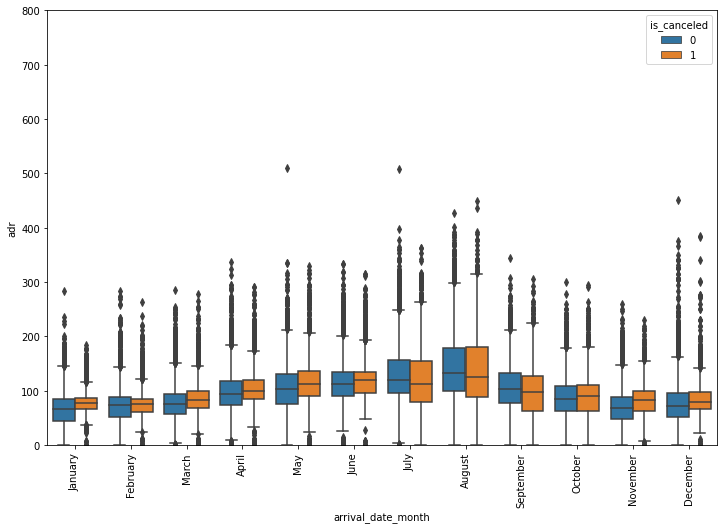

In [64]:
plt.figure(figsize=(12,8))
sb.boxplot(x="arrival_date_month",y="adr",data=data,hue="is_canceled")
plt.xticks(rotation="vertical")
plt.ylim(0,800)
plt.show()

In [65]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [66]:
pd.crosstab(index=data["stays_in_weekend_nights"],columns=data["stays_in_week_nights"])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
def week_func(row):
    feature1="stays_in_weekend_nights"
    feature2="stays_in_week_nights"
    if row[feature2]==0 and row[feature1]>0:
        return "stay_just weekend"
    elif row[feature2]>0 and row[feature1]==0:
        return 'stay_just_weekdays'
    elif row[feature2]>0 and row[feature1]>0:
        return 'stay_just_weekdays and week ends'
    else:
        return "Undifined_data"
    
    

In [68]:
data2["weekend_or_weekday"]=data2.apply(week_func,axis=1)

In [69]:
data2['weekend_or_weekday'].value_counts()

stay_just_weekdays and week ends    37551
stay_just_weekdays                  31788
stay_just weekend                    5050
Undifined_data                        622
Name: weekend_or_weekday, dtype: int64

In [70]:
data2.shape

(75011, 31)

In [71]:
data.shape

(119210, 30)

In [72]:
data2=sd.Sort_Dataframeby_Month(data2,"arrival_date_month")

In [73]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday              
April               Undifined_data                        30
                    stay_just weekend                    344
                    stay_just_weekdays                  2559
                    stay_just_weekdays and week ends    3627
August              Undifined_data                        49
                    stay_just weekend                    509
                    stay_just_weekdays                  3137
                    stay_just_weekdays and week ends    4929
December            Undifined_data                        69
                    stay_just weekend                    298
                    stay_just_weekdays                  2123
                    stay_just_weekdays and week ends    1901
February            Undifined_data                        47
                    stay_just weekend                    360
                    stay_just_weekdays                  2514
                    stay_just_we

In [74]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [75]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,"arrival_date_month")

In [76]:
sorted_data.set_index('arrival_date_month',inplace=True)

<AxesSubplot: xlabel='arrival_date_month'>

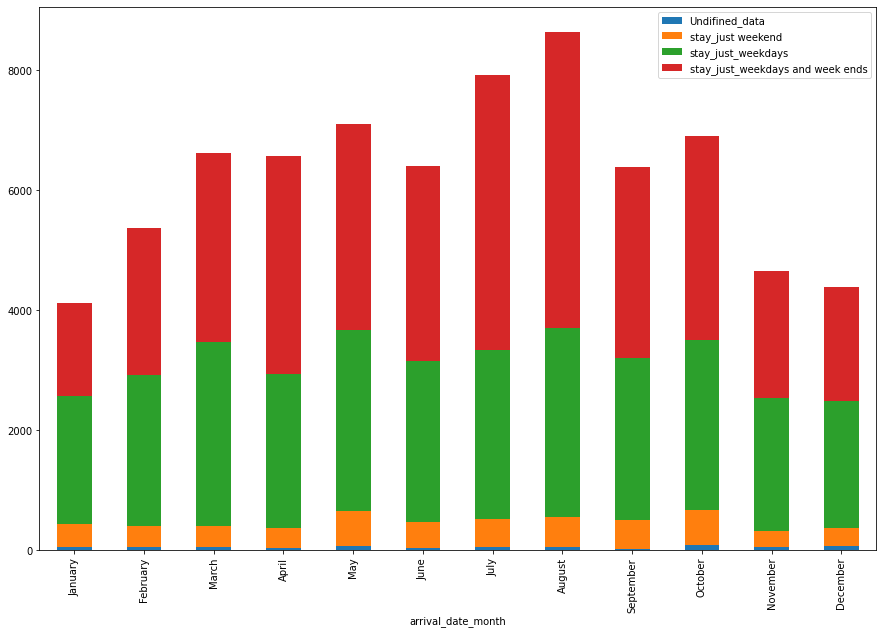

In [77]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [78]:
def family(row):
    if (row['adults']>0)&(row['children']>0)& (row['babies']>0):
        return 1
    else:
        return 0
    

In [79]:
data['is_family']=data.apply(family,axis=1)

In [80]:
data['total_customer']=data['adults']+data['babies']+data['children']

In [81]:
data['total_nights']=data['stays_in_week_nights']+data["stays_in_weekend_nights"]

In [82]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,0,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,Transient,119.00,0,0,Canceled,12/22/2015,0,4.0,2


In [83]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [84]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [85]:
dic1={
    'No Deposit':0, 'Non Refund':1, 'Refundable:':0
}

In [86]:
data['deposit_given']=data['deposit_type'].map(dic1)

In [87]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [88]:
data.drop(columns=[ 'adults', 'children', 'babies','deposit_type'],axis=1,inplace=True)

In [89]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0.0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,0,4.0,1,0.0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0.0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0.0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,0,4.0,2,0.0
5,Resort Hotel,1,76,2016,January,1,1,1,2,BB,...,Transient,57.90,0,1,Canceled,12/20/2015,0,2.0,3,0.0


In [90]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [91]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [92]:
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [93]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [94]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [95]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [96]:
data_cat=data[cate_features]

In [97]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [98]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [99]:
data_cat['cancellation']=data['is_canceled']

In [100]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [101]:
cols=data_cat.columns

In [102]:
cols=cols[0:-1]

In [103]:
for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [104]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,0.684211,1


In [105]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0.0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,0,4.0,1,0.0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0.0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0.0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,0,4.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,0,3.0,11,0.0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0.0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0.0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0.0


In [106]:
data_frame=pd.concat([data_cat,data[num_features]],axis=1)

In [107]:
data_frame.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0.0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,0,4.0,1,0.0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0.0
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0.0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,...,0,0,0,119.00,0,0,0,4.0,2,0.0


In [108]:
data_frame.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [109]:
data_frame.drop(['cancellation'],axis=1,inplace=True)

In [110]:
data_frame.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0.0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,0,4.0,1,0.0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0.0
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0.0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,...,0,0,0,119.00,0,0,0,4.0,2,0.0


<AxesSubplot: xlabel='lead_time', ylabel='Density'>

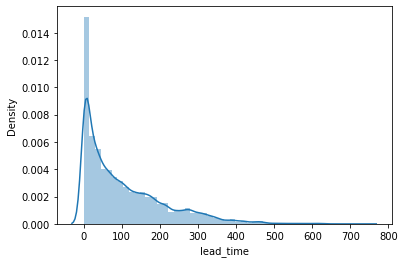

In [111]:
sb.distplot(data_frame['lead_time'])

In [112]:
def handle_outlier(col):
    data_frame[col]=np.log1p(data_frame[col])

In [113]:
handle_outlier('lead_time')

<AxesSubplot: xlabel='lead_time', ylabel='Density'>

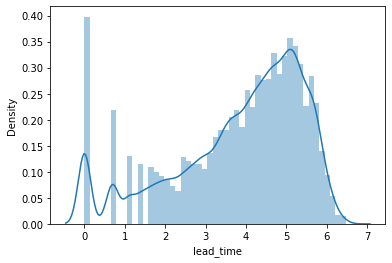

In [114]:
sb.distplot(data_frame['lead_time'])

In [115]:
handle_outlier('adr')

<AxesSubplot: xlabel='adr', ylabel='Density'>

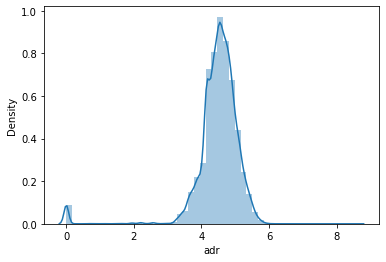

In [116]:
sb.distplot(data_frame['adr'].dropna())

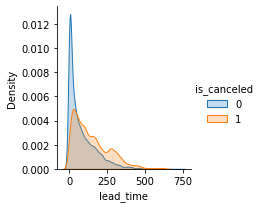

In [117]:
sb.FacetGrid(data,hue="is_canceled").map(sb.kdeplot,'lead_time',shade=True).add_legend()

In [118]:
corr=data_frame.corr()

In [119]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.021158,-0.038762,-0.249747,0.172060
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.000212,0.079090,0.045648,0.057172
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.005735,-0.003447,-0.055689,0.047661
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,0.009694,-0.117351,-0.160759,0.395885
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.037013,-0.023874,-0.004546,0.398772
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.040632,0.087776,0.084999,0.114793
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.032778,-0.246347,-0.188866,0.202183
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.042367,-0.229081,-0.103571,0.263600
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.018146,0.124318,0.037720,0.121279
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.014080,0.044826,0.018554,0.481670


In [120]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481670
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [121]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [122]:
features_to_drop=['reservation_status','reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [123]:
data_frame.drop(features_to_drop,axis=1,inplace=True)

In [124]:
data_frame.shape

(119210, 24)

In [125]:
data_frame.isna().sum()

hotel                               0
arrival_date_month                  0
meal                                0
country                             0
market_segment                      0
distribution_channel                0
reserved_room_type                  0
assigned_room_type                  0
customer_type                       0
is_canceled                         0
lead_time                           0
stays_in_week_nights                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
booking_changes                     0
days_in_waiting_list                0
adr                                 1
required_car_parking_spaces         0
total_of_special_requests           0
is_family                           0
total_customer                      0
total_nights                        0
deposit_given                     162
dtype: int64

In [126]:
data_frame.dropna(inplace=True)

In [127]:
x=data_frame.drop('is_canceled',axis=1)

In [128]:
y=data_frame['is_canceled']

In [129]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [130]:
Lasso(alpha=0.005)

Lasso(alpha=0.005)

In [131]:
feature_sel=SelectFromModel(Lasso(alpha=0.005))

In [132]:
feature_sel.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [133]:
feature_sel.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [134]:
cols=x.columns

In [135]:
sel=cols[feature_sel.get_support()]

In [136]:
sel

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [137]:
x=x[sel]

In [138]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119047, dtype: int64

In [139]:
from sklearn.model_selection import train_test_split,cross_val_score

In [140]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)

In [141]:
X_train.shape

(89285, 12)

In [142]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [143]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [144]:
pred=logreg.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [146]:
accuracy_score(pred,Y_test)

0.7979302466232108

In [147]:
confusion_matrix(Y_test,pred)

array([[17425,  1291],
       [ 4723,  6323]], dtype=int64)

In [148]:
score=cross_val_score(logreg,x,y,cv=10)

In [149]:
score

array([0.77564049, 0.79092818, 0.78294834, 0.8151197 , 0.81293574,
       0.73716926, 0.74178916, 0.85483871, 0.83602151, 0.80359543])

In [150]:
score.mean()

0.7950986514543902

Applying the multiple alogrithms for the data

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [152]:
model=[]
model.append(('LogisticRegression',LogisticRegression()))
model.append(("Navies bayes",GaussianNB()))
model.append(("Random Forest",RandomForestClassifier()))
model.append(("Decsion Tree",DecisionTreeClassifier()))
model.append(("KNN",KNeighborsClassifier()))

In [155]:
for name,models in model:
    print(name)
    models.fit(X_train,Y_train)
    predictions=models.predict(X_test)
    print(confusion_matrix(predictions,Y_test))
    print('\n')
    print(accuracy_score(predictions,Y_test))
    print('\n')

LogisticRegression
[[17425  4723]
 [ 1291  6323]]


0.7979302466232108


Navies bayes
[[ 6728   690]
 [11988 10356]]


0.574020563134198


Random Forest
[[17125  2734]
 [ 1591  8312]]


0.8546804650225119


Decsion Tree
[[15897  2605]
 [ 2819  8441]]


0.8177541831866137


KNN
[[16634  3320]
 [ 2082  7726]]


0.8184933808211814


